In [93]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from collections import Counter

### Exercise 1: Word Cloud Generation

In [94]:
class AdvancedWordCloud:
    def __init__(self, width = 800, height = 800, background_color = "white"):
        self.width = width
        self.height = height
        self.background_color = background_color

    # Basic word cloud Method
    def basic_cloud(self, text, min_font_size = 10, colormap = "viridis", mask = None):
        wordcloud = WordCloud(
            width = self.width,
            height = self.height,
            background_color = self.background_color,
            colormap = colormap,
            max_words = 200,
            mask = mask,
            contour_width = 3,
            contour_color = "steelblue",
            min_font_size = min_font_size
        ).generate(text)

        return wordcloud

    def plot_cloud(self, wordcloud, title = "World Cloud Visualization"):
        # Set figure size
        plt.figure(figsize = (15, 15))
        # Display word cloud image
        plt.imshow(wordcloud, interpolation = "bilinear")
        # Remove axis for cleaner look
        plt.axis("off")
        # Set title of plot
        plt.title(title)
        # Save plot
        plt.savefig("BasicWordCloud")
        # Show plot
        plt.show()


    # 1. Enhance word cloud with custom stop words
    def compare_stopwords(self, text, custom_stops = None):
        if custom_stops is None:
            custom_stops = {"said", "using", "would"}

        stops = STOPWORDS.union(custom_stops)

        # Original Word Cloud
        wordcloud_og = self.basic_cloud(text)

        # With Custom Stopwords
        custom_wordcloud = WordCloud(
            width = self.width, 
            height = self.height,
            background_color = self.background_color,
            stopwords = stops
        ).generate(text)

        return wordcloud_og, custom_wordcloud

    def plot_comparison(self, wordcloud_og, custom_wordcloud, title = "Word Cloud Comparison"):
        # Plot side by side
        fig, axes = plt.subplots(1, 2, figsize = (15, 15))
        axes[0].imshow(wordcloud_og, interpolation = "bilinear")
        axes[0].set_title("Original Word Cloud")
        axes[0].axis("off")

        axes[1].imshow(custom_wordcloud, interpolation = "bilinear")
        axes[1].set_title("With Custom Stopwords")
        axes[1].axis("off")

        plt.savefig("WordCloudComparison")

        plt.show()

    # 2. Generate frequency-based word count
    def frequency_cloud(self, text, top_n = 50, min_word_length = 3):
        # Tokenize words using regex
        tokens = re.findall(r"\b[a-zA-Z]{%d,}\b" % min_word_length, text.lower())
        tokens = [word for word in tokens if word not in STOPWORDS]

        # Count frequencies
        freq = Counter(tokens)
        most_common = freq.most_common(top_n)

        # Word Cloud from frequencies
        wordcloud = self.basic_cloud(text)
        freq_cloud = wordcloud.generate_from_frequencies(dict(most_common))

        # Plot Word Cloud and Frequency List
        fig, axes = plt.subplots(1, 2, figsize = (15, 12))

        axes[0].imshow(freq_cloud, interpolation = "bilinear")
        axes[0].set_title("Frequency-based Word Cloud")
        axes[0].axis("off")

        # Display frequency list as text
        freq_list = [f"{word}: {count}" for word, count in most_common]
        axes[1].text(0.05, 0.95, "\n".join(freq_list), fontsize = 12, va = "top")
        axes[1].axis("off")
        axes[1].set_title("Top Word Frequencies")

        plt.savefig("FrequencyWordCloud")

        plt.show()

        print(most_common)


In [95]:
sentences = [
    "Natural Language Processing allows computers to understand human language.",
    "Tokenization is the process of splitting text into words or sentences.",
    "Word embeddings like Word2Vec and GloVe represent words as vectors.",
    "Named Entity Recognition identifies proper nouns in text.",
    "Part-of-speech tagging labels words with their grammatical roles.",
    "Sentiment analysis determines the emotional tone of text.",
    "Machine translation converts text from one language to another.",
    "Text classification assigns categories to text based on content.",
    "Stopwords are common words that are often removed during preprocessing.",
    "NLP applications include chatbots, virtual assistants, and search engines."
]

Basic Word Cloud Implementation

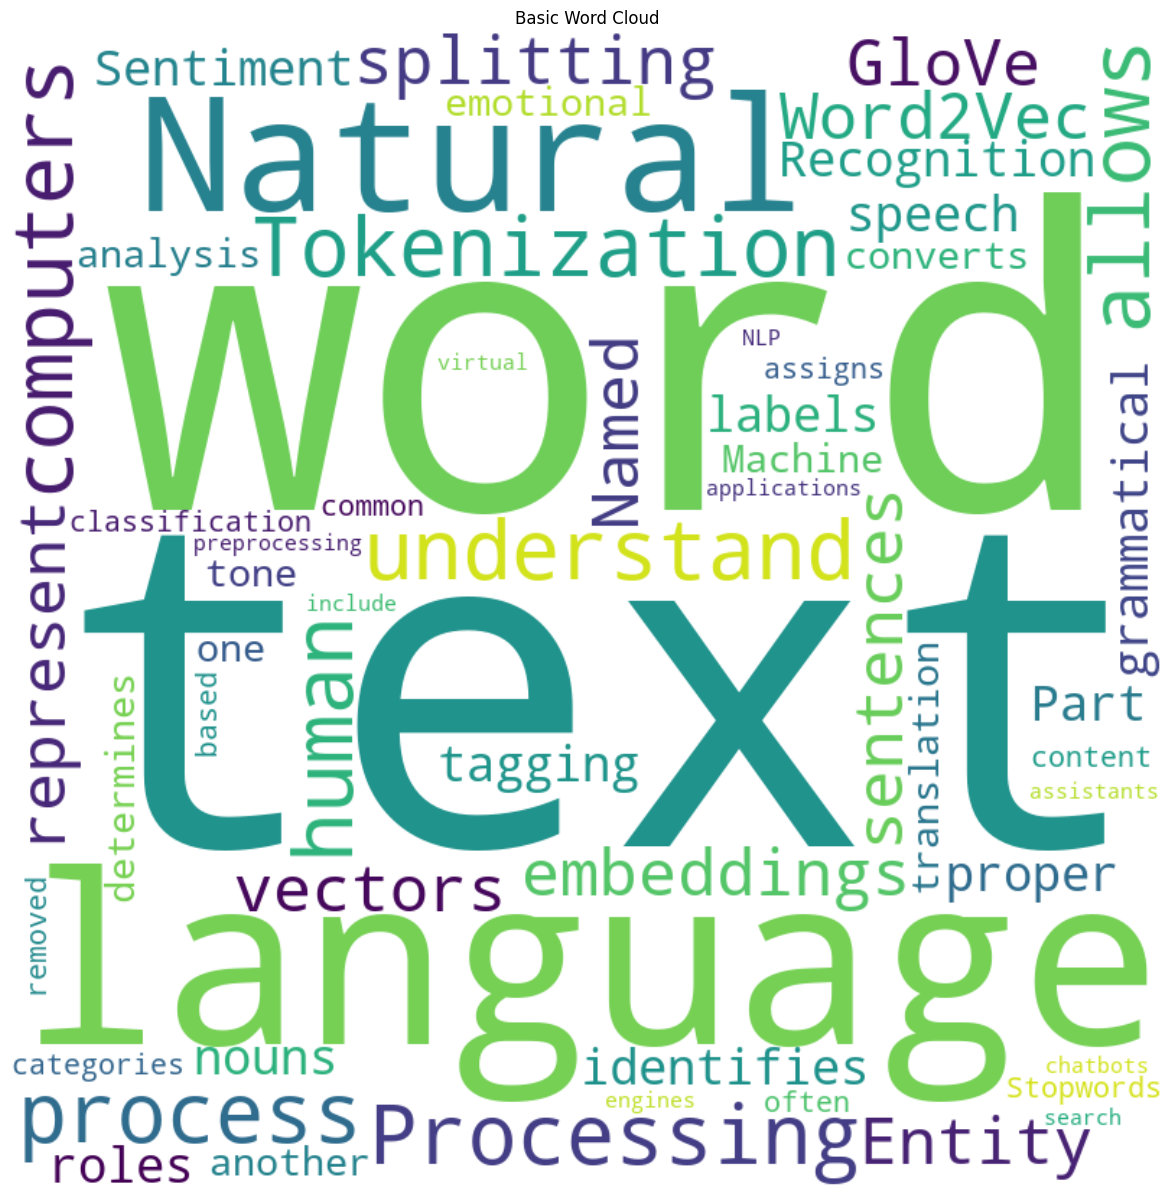

In [96]:
# Create Instance (Object)
cloud1 = AdvancedWordCloud()
# Create Word Cloud
word_cloud = cloud1.basic_cloud(" ".join(sentences))
# Visualize Word Cloud
cloud1.plot_cloud(word_cloud, "Basic Word Cloud")

Custom Stopword Comparison

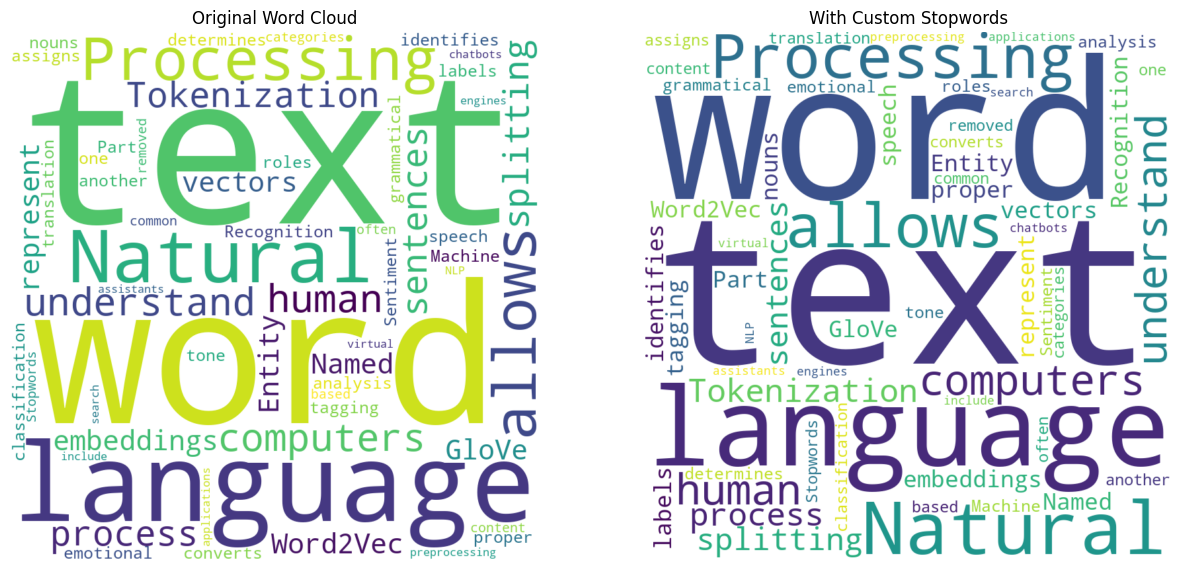

In [97]:
# Create Custom Word Cloud
og, new = cloud1.compare_stopwords(" ".join(sentences))
# Visulize OG vs Custom Word Clouds
cloud1.plot_comparison(og, new)

Frequency-Based Word Cloud

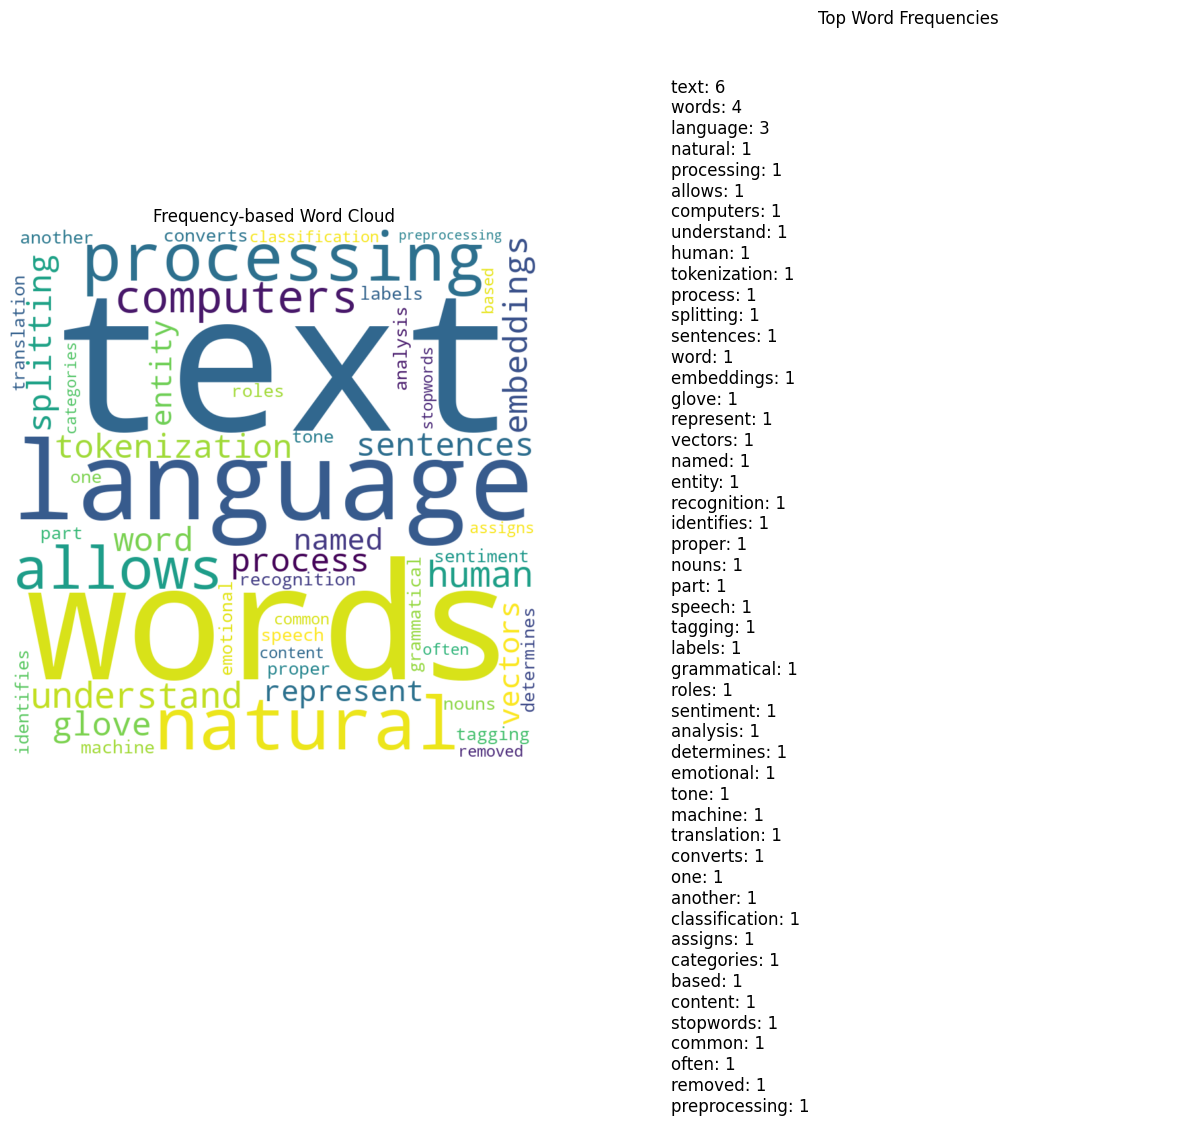

[('text', 6), ('words', 4), ('language', 3), ('natural', 1), ('processing', 1), ('allows', 1), ('computers', 1), ('understand', 1), ('human', 1), ('tokenization', 1), ('process', 1), ('splitting', 1), ('sentences', 1), ('word', 1), ('embeddings', 1), ('glove', 1), ('represent', 1), ('vectors', 1), ('named', 1), ('entity', 1), ('recognition', 1), ('identifies', 1), ('proper', 1), ('nouns', 1), ('part', 1), ('speech', 1), ('tagging', 1), ('labels', 1), ('grammatical', 1), ('roles', 1), ('sentiment', 1), ('analysis', 1), ('determines', 1), ('emotional', 1), ('tone', 1), ('machine', 1), ('translation', 1), ('converts', 1), ('one', 1), ('another', 1), ('classification', 1), ('assigns', 1), ('categories', 1), ('based', 1), ('content', 1), ('stopwords', 1), ('common', 1), ('often', 1), ('removed', 1), ('preprocessing', 1)]


In [98]:
# Find and Visualize Frequency Count
cloud1.frequency_cloud(" ".join(sentences))

### Exercise 2: Social Media Sentiment Analysis

In [99]:
import nltk
from nltk.corpus import twitter_samples
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns

Download NLTK data

In [100]:
nltk.download("twitter_samples")
nltk.download("vader_lexicon")

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Nikolai\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nikolai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [101]:
# Define SentimentAnalyzer class for analyzing tweet sentiments
class SentimentAnalyzer:
    # Initialize SentimentAnalyzer object
    def __init__(self):
        # Try to initialize VADER sentiment analyzer
        try:
            self.sia = SentimentIntensityAnalyzer()
        except Exception as e:
            # If VADER lexicon is missing, download and re-initialize
            print(f"VADER lexicon failed to load: {e}")
            nltk.download("vader_lexicon")
            self.sia = SentimentIntensityAnalyzer()

        # Load positive tweets from NLTK twitter_samples corpus
        self.pos_tweets = twitter_samples.strings("positive_tweets.json")
        # Load negative tweets from NLTK twitter_samples corpus
        self.neg_tweets = twitter_samples.strings("negative_tweets.json")
        # Combine positive and negative tweets into one list
        self.all_tweets = self.pos_tweets + self.neg_tweets

        # Initialize empty list to store analyzed tweet data
        self.analyzed_tweets = []

    # Analyze all tweets and store their sentiment scores
    def analyze_tweets(self):
        # Reset analyzed_tweets list
        self.analyzed_tweets = []
        
        # Iterate through tweets in all_tweets
        for tweet in self.all_tweets:
            # Get sentiment scores for tweet
            score = self.sia.polarity_scores(tweet)
            # Append tweet and its scores to analyzed_tweets
            self.analyzed_tweets.append({
                "text": tweet,
                "compound": score["compound"],
                "pos": score["pos"],
                "neg": score["neg"],
                "neu": score["neu"]
            })

        # Return list of analyzed tweets
        return self.analyzed_tweets

    # Display sentiment scores for sample of tweets
    def display_scores(self, num_samples = 5):
        print("\nTweet Sentiment Scores:\n")
        # Show scores for first and last num_samples tweets
        for tweet in self.all_tweets[:num_samples] + self.all_tweets[-num_samples:]:
            # Get sentiment scores for tweet
            score = self.sia.polarity_scores(tweet)
            # Print tweet and its sentiment scores
            print(f"Tweet: {tweet}\nScores: {score}\n")

    # Find most positive and most negative tweets
    def find_extremes(self, top_n = 5):
        # If tweets haven't been analyzed yet, analyze them
        if not self.analyzed_tweets:
            self.analyze_tweets()

        # Sort tweets by compound score (sentiment)
        sorted_by_compound = sorted(self.analyzed_tweets, key = lambda x: x["compound"])
        # Select most negative tweets
        most_negative = sorted_by_compound[:top_n]
        # Select most positive tweets (reverse order)
        most_positive = sorted_by_compound[-top_n:][::-1]

        # Return both most positive and most negative tweets
        return most_positive, most_negative

    # Display list of extreme tweets with their sentiment scores
    def display_extremes(self, tweets, label = "Extreme Tweets"):
        print(f"\n{label}:\n")
        # Print each tweet's compound, positive, and negative scores, and text
        for t in tweets:
            print(f"Compound: {t['compound']}, Pos: {t['pos']}, Neg: {t['neg']}")
            print(f"Tweet: {t['text']}\n")

    # Plot histogram of compound sentiment scores for all tweets
    def plot_distribution(self, bins = 20):
        # If tweets haven't been analyzed yet, analyze them
        if not self.analyzed_tweets:
            self.analyze_tweets()
        # Extract compound scores from analyzed tweets
        compound_scores = [t["compound"] for t in self.analyzed_tweets]

        # Create histogram plot of compound scores
        plt.figure(figsize=(10,5))
        plt.hist(compound_scores, bins=bins, color = "skyblue", edgecolor = "black")
        plt.title("Distribution of Tweet Compound Sentiment Scores")
        plt.xlabel("Compound Sentiment Score")
        plt.ylabel("Number of Tweets")
        plt.grid(axis = "y", alpha = 0.75)
        # Save plot as image file
        plt.savefig("SentimentScoreDistribution")
        # Display plot
        plt.show()

Sentiment Analysis Implementation

In [102]:
# Create an Instance (Object)
analyzer1 = SentimentAnalyzer()
# Display Scores
analyzer1.display_scores()


Tweet Sentiment Scores:

Tweet: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Scores: {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.7579}

Tweet: @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
Scores: {'neg': 0.145, 'neu': 0.585, 'pos': 0.27, 'compound': 0.6229}

Tweet: @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Scores: {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.7959}

Tweet: @97sides CONGRATS :)
Scores: {'neg': 0.0, 'neu': 0.123, 'pos': 0.877, 'compound': 0.7983}

Tweet: yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days
Scores: {'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.795}

Tweet: I wanna change my avi but uSanele :(
Scores: {'neg': 0.391, 'neu': 0.609, 'pos': 0.0, 'compound': -0.5927}


In [103]:
# Analyze All
analyzer1.analyze_tweets()

[{'text': '#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
  'compound': 0.7579,
  'pos': 0.385,
  'neg': 0.0,
  'neu': 0.615},
 {'text': '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
  'compound': 0.6229,
  'pos': 0.27,
  'neg': 0.145,
  'neu': 0.585},
 {'text': '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
  'compound': 0.7959,
  'pos': 0.294,
  'neg': 0.0,
  'neu': 0.706},
 {'text': '@97sides CONGRATS :)',
  'compound': 0.7983,
  'pos': 0.877,
  'neg': 0.0,
  'neu': 0.123},
 {'text': 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
  'compound': 0.795,
  'pos': 0.282,
  'neg': 0.0,
  'neu': 0.718},
 {'text': '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM

In [104]:
# Find and Visualize Extremes
most_pos, most_neg = analyzer1.find_extremes()
analyzer1.display_extremes(most_pos, label = "Most Positive Tweets")
analyzer1.display_extremes(most_neg, label = "Most Negative Tweets")


Most Positive Tweets:

Compound: 0.9872, Pos: 0.783, Neg: 0.0
Tweet: There :) is :) a :) pimple :) on :) my :) forehead :) the :) size :) of :) a :) volcano :)

Compound: 0.98, Pos: 0.635, Neg: 0.0
Tweet: A year ago I married my first love and my best friend.  Thanks for an amazing year Glenn!  I love being your wife! :) http://t.co/CbiP1LHLuc

Compound: 0.9798, Pos: 0.651, Neg: 0.0
Tweet: Lol :D @akshaykumar i know it was your idea :p coz you have unforgettable sense of humor ;) :) :D love you bro :* https://t.co/qiyrhDK9eB

Compound: 0.9796, Pos: 0.621, Neg: 0.0
Tweet: When the managers at your job tell you and your friend that you are the two prettiest girls there :) :) :) :) :) :) :)

Compound: 0.9784, Pos: 0.66, Neg: 0.0
Tweet: @clmazin @johnaugust Norhing but the Dialogue was so helpful! More like this please! Love you guys :)


Most Negative Tweets:

Compound: -0.9686, Pos: 0.0, Neg: 0.554
Tweet: This actually made me cry this is so disgusting whAT THE ACTUAL FUCK im disgusted 

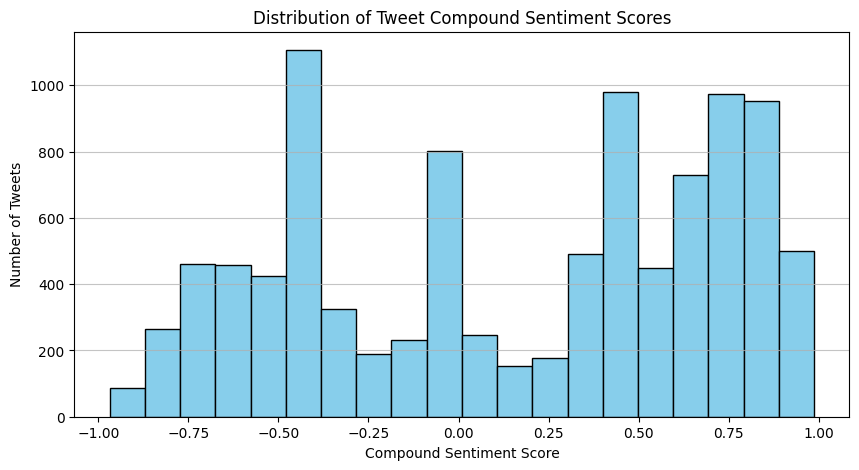

In [105]:
# Visualize Sentiment Score Distribution
analyzer1.plot_distribution()